# Subtract background intensity images

In [39]:
import os
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from form_radiometry import save_image

In [8]:
rotneg90_rect_rot90_data_dir = os.path.join('data', 'rotneg90_rect_rot90')
bkgd_dir = os.path.join(rotneg90_rect_rot90_data_dir, 'background_lf')
lf_dir = os.path.join(rotneg90_rect_rot90_data_dir, 'lf_slice14')
lf_minus_bkgd_dir = os.path.join(rotneg90_rect_rot90_data_dir, 'lf_slice14_minus_bkgd')

In [9]:
intensity_filenames = [
    'state0_rectified.tif',
    'state1_rectified.tif',
    'state2_rectified.tif',
    'state3_rectified.tif',
    'state4_rectified.tif'
]

In [10]:
state0_xylem = tifffile.imread(os.path.join(lf_dir, intensity_filenames[0]))
state0_bkgd = tifffile.imread(os.path.join(bkgd_dir, intensity_filenames[0]))

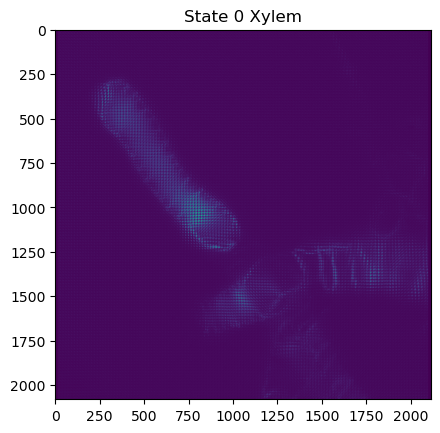

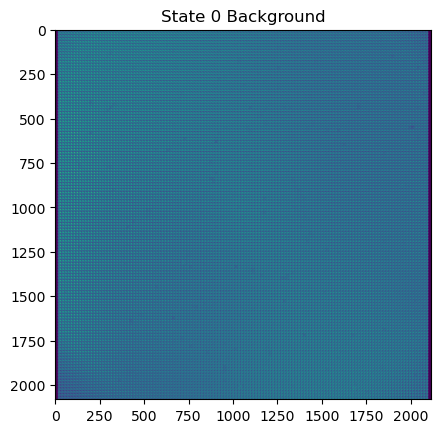

In [11]:
plt.imshow(state0_xylem)
plt.title('State 0 Xylem')
plt.show()

plt.imshow(state0_bkgd)
plt.title('State 0 Background')
plt.show()


In [12]:
def compare_cropped_tif_images(image_path1, image_path2, x, y, width, height):
    """
    Compare cropped regions of two TIFF images, display the differences, and print basic statistics.
    
    Parameters:
        image_path1 (str): Path to the first TIFF image.
        image_path2 (str): Path to the second TIFF image.
        x, y (int): Coordinates of the top-left corner of the crop rectangle.
        width, height (int): Width and height of the crop rectangle.
    """
    # Load the images
    img1 = tifffile.imread(image_path1)
    img2 = tifffile.imread(image_path2)

    # Crop the images
    img1_cropped = img1[y:y+height, x:x+width]
    img2_cropped = img2[y:y+height, x:x+width]

    # Calculate differences
    diff = img1_cropped.astype(float) - img2_cropped.astype(float)

    # Display the images and their difference
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    ax1, ax2, ax3 = axes
    ax1.imshow(img1_cropped, cmap='gray')
    ax1.set_title('Cropped Image 1')
    ax1.axis('off')

    ax2.imshow(img2_cropped, cmap='gray')
    ax2.set_title('Cropped Image 2')
    ax2.axis('off')

    im = ax3.imshow(diff, cmap='coolwarm', vmin=-np.max(np.abs(diff)), vmax=np.max(np.abs(diff)))
    ax3.set_title('Difference of Cropped Area')
    ax3.axis('off')
    fig.colorbar(im, ax=ax3, orientation='vertical')
    
    plt.show()

    # Print basic statistics
    print(f"Mean difference: {np.mean(diff)}")
    print(f"Standard deviation of differences: {np.std(diff)}")
    print(f"Total difference (sum of absolute differences): {np.sum(np.abs(diff))}")

In [13]:
state0_xylem_path = os.path.join(lf_dir, intensity_filenames[0])
state0_bkgd_path = os.path.join(bkgd_dir, intensity_filenames[0])

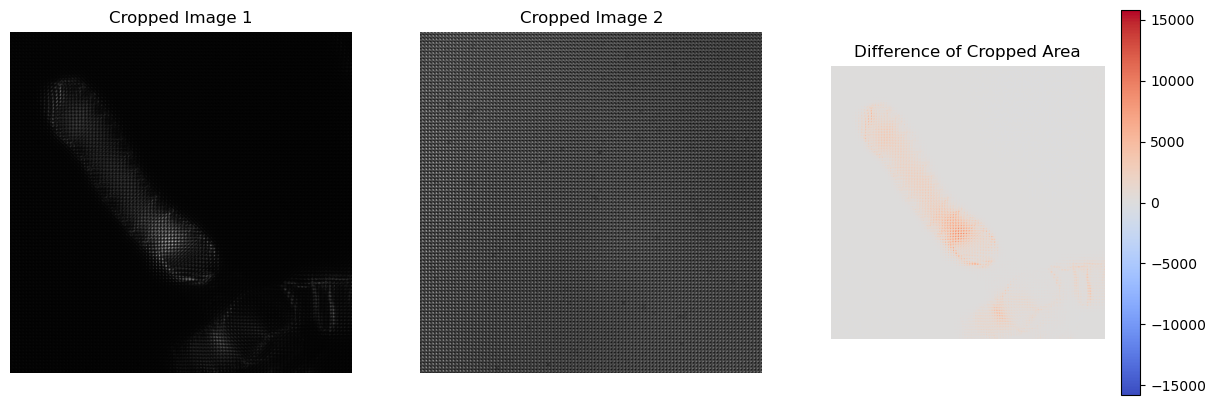

Mean difference: 217.623171484375
Standard deviation of differences: 636.7435371131363
Total difference (sum of absolute differences): 571201013.0


In [16]:
x, y, width, height = 64, 64, 1600, 1600
compare_cropped_tif_images(state0_xylem_path, state0_bkgd_path, x, y, width, height)

In [41]:
for filename in intensity_filenames:
    xylem_path = os.path.join(lf_dir, filename)
    bkgd_path = os.path.join(bkgd_dir, filename)
    xylem_img = tifffile.imread(xylem_path)
    bkgd_img = tifffile.imread(bkgd_path)
    # Assuming xylem_img and bkgd_img are NumPy arrays of type uint16
    # Convert to a higher data type before subtraction to handle negative values
    xylem_minus_bkgd = xylem_img.astype(np.int32) - bkgd_img.astype(np.int32)
    xylem_minus_bkgd_with_offset = xylem_minus_bkgd + 12000
    xylem_minus_bkgd_clipped = np.clip(xylem_minus_bkgd_with_offset, 0, None).astype(np.uint16)
    # xylem_minus_bkgd = xylem_img - bkgd_img
    print(xylem_minus_bkgd_with_offset.min(), xylem_minus_bkgd_with_offset.max())
    # xylem_minus_bkgd_clipped = np.clip(xylem_minus_bkgd, 0, None)
    # compare_cropped_tif_images(xylem_path, bkgd_path, x, y, width, height)
    xylem_minus_bkgd_path = os.path.join(lf_minus_bkgd_dir, filename)
    save_image(xylem_minus_bkgd_path, xylem_minus_bkgd_clipped)
    print(f"Saved rotated image to {xylem_minus_bkgd_path}")

11786 27803
Saved rotated image to data\rotneg90_rect_rot90\lf_slice14_minus_bkgd\state0_rectified.tif
2764 40981
Saved rotated image to data\rotneg90_rect_rot90\lf_slice14_minus_bkgd\state1_rectified.tif
3249 30938
Saved rotated image to data\rotneg90_rect_rot90\lf_slice14_minus_bkgd\state2_rectified.tif
1853 33378
Saved rotated image to data\rotneg90_rect_rot90\lf_slice14_minus_bkgd\state3_rectified.tif
966 33496
Saved rotated image to data\rotneg90_rect_rot90\lf_slice14_minus_bkgd\state4_rectified.tif


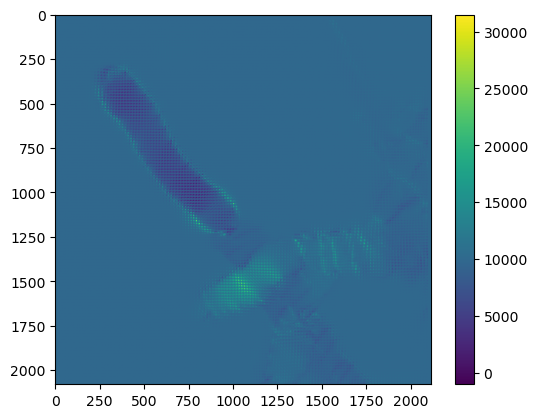

In [38]:
plt.imshow(xylem_minus_bkgd_with_offset)
plt.colorbar()

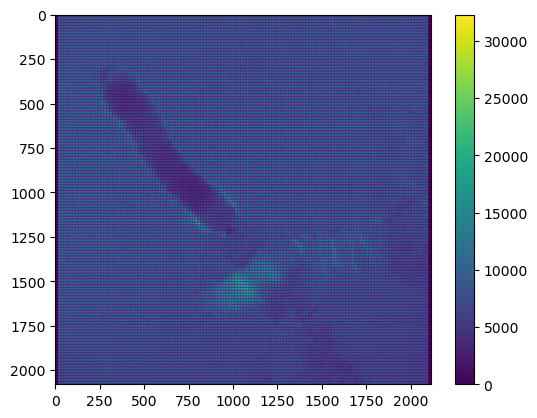

In [23]:
plt.imshow(xylem_img)
plt.colorbar()

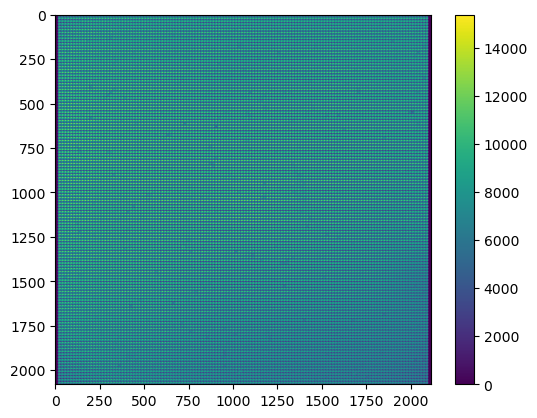

In [24]:
plt.imshow(bkgd_img)
plt.colorbar()

In [25]:
bkgd_img.max()

15379

In [28]:
xylem_minus_bkgd = xylem_img - bkgd_img

In [30]:
xylem_minus_bkgd[160:320, 160:320]

array([[65493, 65447, 65461, ..., 65446, 65505, 65470],
       [65454, 65436, 65423, ..., 65451, 65465, 65519],
       [65459, 65492, 65440, ..., 65373, 65451, 65515],
       ...,
       [65473,    30,    51, ..., 64398, 64863, 65115],
       [   29, 65533,    71, ..., 65025, 65297, 65340],
       [65511,    30, 65535, ..., 65405, 65443, 65507]], dtype=uint16)

In [31]:
xylem_img[160:320, 160:320]

array([[1763, 1963, 2435, ..., 2610, 2141, 1761],
       [2155, 2511, 3010, ..., 3840, 2739, 2179],
       [2995, 3458, 3992, ..., 5969, 4323, 3052],
       ...,
       [2827, 3735, 4854, ..., 3977, 2827, 2074],
       [2170, 2520, 3419, ..., 2644, 2082, 1611],
       [1771, 2010, 2490, ..., 2125, 1701, 1533]], dtype=uint16)

In [32]:
bkgd_img[160:320, 160:320]

array([[1806, 2052, 2510, ..., 2700, 2172, 1827],
       [2237, 2611, 3123, ..., 3925, 2810, 2196],
       [3072, 3502, 4088, ..., 6132, 4408, 3073],
       ...,
       [2890, 3705, 4803, ..., 5115, 3500, 2495],
       [2141, 2523, 3348, ..., 3155, 2321, 1807],
       [1796, 1980, 2491, ..., 2256, 1794, 1562]], dtype=uint16)